In [1]:
import pandas as pd
import numpy as np
import umap
from sklearn.decomposition import PCA
from os.path import join, exists
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from pca import pca

In [2]:
### PCA
SPECIES = ['PJ', 'BV', 'AC', 'DP', 'BT', 'DL', 'BH', 'BP',
       'CS', 'EL']
FOLDER = join('Data', 'Species')
def load_growth_data(filename):
    """Load growth data from a CSV file."""
    data = pd.read_csv(join(FOLDER, filename))
    
    data_growth = (data[data['Time'] == 24][SPECIES].values - data[data['Time'] == 0][SPECIES].values )
    
    growth_df = pd.DataFrame(data_growth, columns=SPECIES)
    growth_df['Treatments'] = data[data['Time'] == 24]['Treatments'].values
    growth_df = growth_df.reset_index(drop=True)
    return growth_df
data_non_scaled = load_growth_data('growth_profile_all.csv')
    
scaler = StandardScaler()

data_numeric = scaler.fit_transform(data_non_scaled[SPECIES].values)
data = pd.DataFrame(data_numeric, columns=SPECIES)
data['Treatments'] = data_non_scaled['Treatments'].values

# PCA

Explained variance by PCA: [0.17685152 0.1469136  0.14068085 0.11600357 0.10243814 0.07963334
 0.07333214 0.07059803 0.05085017 0.04269863]


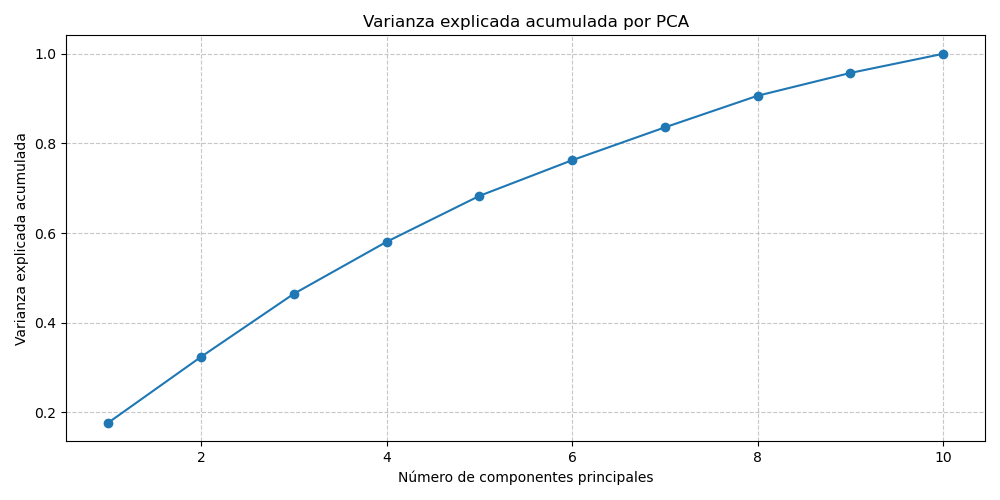

In [36]:
data_groth = data.drop(columns=['Treatments']).values
pca_explore = PCA(n_components=10)
pca_explore.fit(data_groth)
pca_data = pca_explore.transform(data_groth)
explained_variance = pca_explore.explained_variance_ratio_
print(f"Explained variance by PCA: {explained_variance}")
accum_expl = np.cumsum(explained_variance)
fig, ax = plt.subplots(dpi = 100, figsize=(10, 5))

ax.plot(range(1, len(accum_expl) + 1), accum_expl, marker='o')
ax.set_xlabel('Número de componentes principales')
ax.set_ylabel('Varianza explicada acumulada')
ax.set_title('Varianza explicada acumulada por PCA')
ax.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
fig.savefig(join('Figures', 'cumulative_explained_variance_pca.svg'), dpi=300)

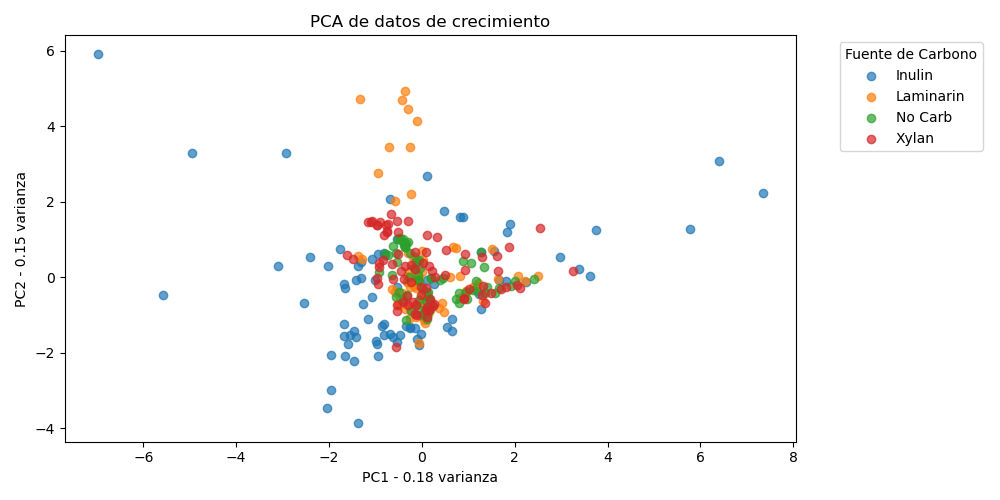

In [37]:
# 2 pca to visualize
pca_2d = PCA(n_components=2)
pca_2d.fit(data_groth)
pca_2d_data = pca_2d.transform(data_groth)

pca_df = pd.DataFrame(pca_2d_data, columns=['PC1', 'PC2'])
pca_df['Treatments'] = data['Treatments'].values
colors = plt.cm.tab10
norm = plt.Normalize(vmin=0, vmax=len(pca_df['Treatments'].unique())-1)
fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
for c, treat in enumerate(pca_df['Treatments'].unique()):
    subset = pca_df[pca_df['Treatments'] == treat]
    ax.scatter(subset['PC1'], subset['PC2'], label=treat, alpha=0.7, color = colors(c))
explained_variance_2d = pca_2d.explained_variance_ratio_
ax.set_xlabel(f'PC1 - {explained_variance_2d[0]:.2f} varianza')
ax.set_ylabel(f'PC2 - {explained_variance_2d[1]:.2f} varianza')
# ax.set_ylabel('PC2')
ax.set_title('PCA de datos de crecimiento')
ax.legend(title='Fuente de Carbono', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.savefig(join('Figures', 'pca_growth_data.svg'), dpi=300)

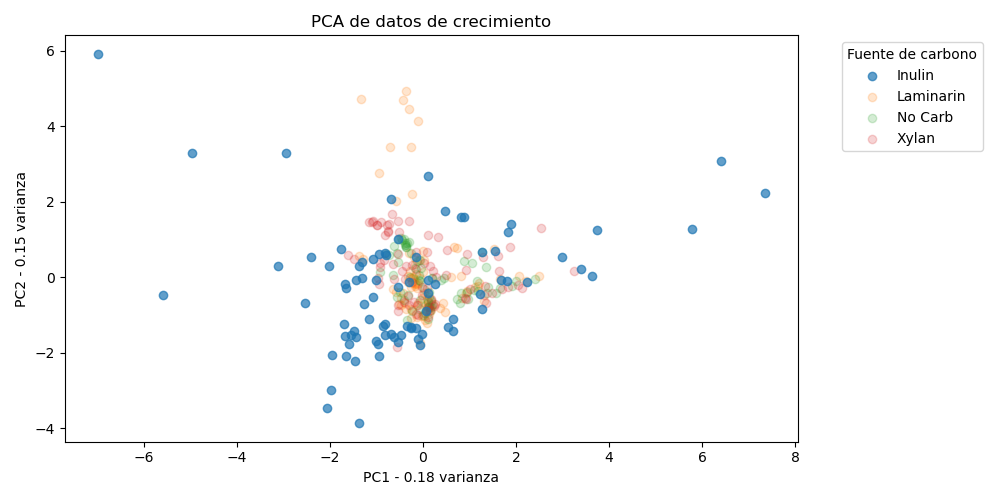

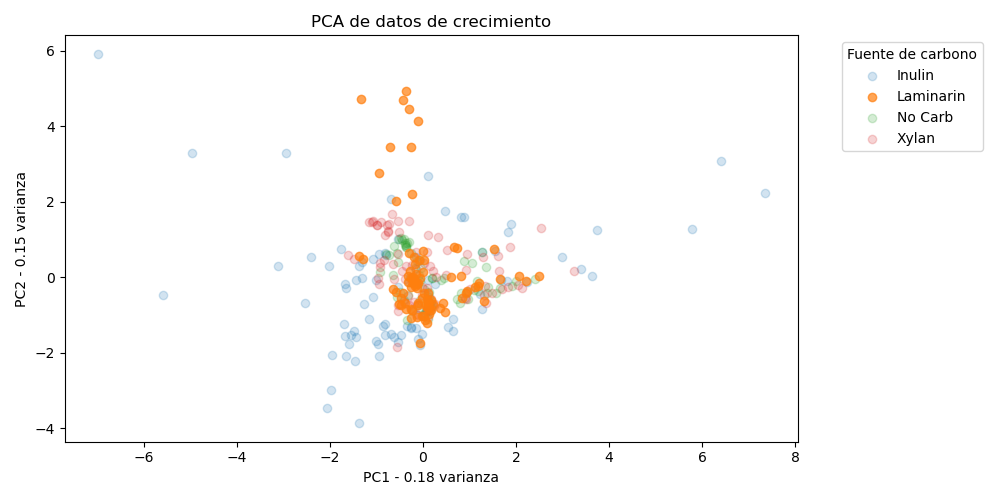

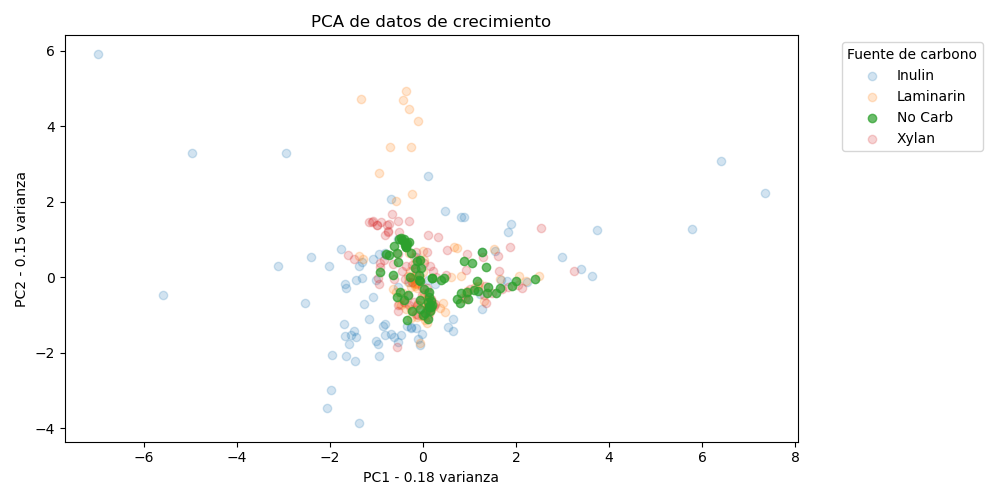

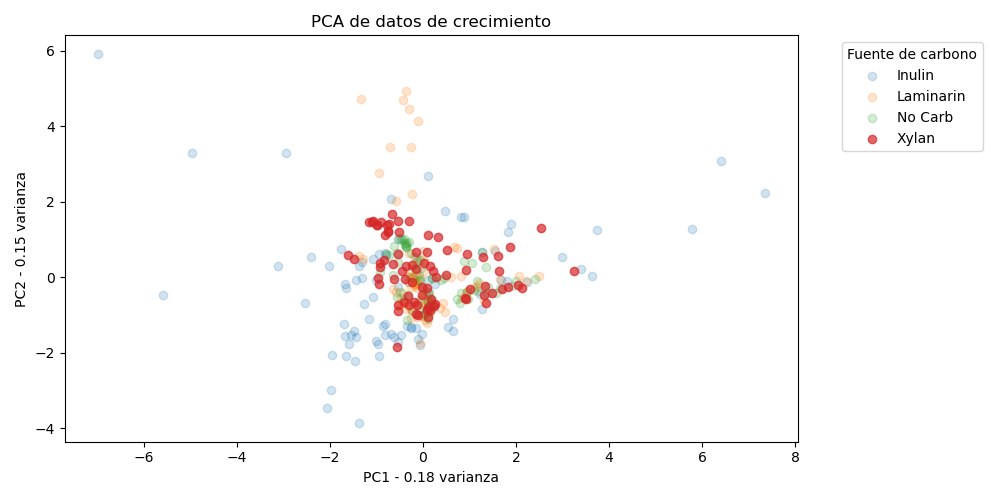

In [38]:
# 2 pca to visualize
pca_2d = PCA(n_components=2)
pca_2d.fit(data_groth)
pca_2d_data = pca_2d.transform(data_groth)

pca_df = pd.DataFrame(pca_2d_data, columns=['PC1', 'PC2'])
pca_df['Treatments'] = data['Treatments'].values
colors = plt.cm.tab10
norm = plt.Normalize(vmin=0, vmax=len(pca_df['Treatments'].unique())-1)

for treatment in pca_df['Treatments'].unique():
    
    fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
    for c, treat in enumerate(pca_df['Treatments'].unique()):
        subset = pca_df[pca_df['Treatments'] == treat]
        if treat == treatment:
 
            ax.scatter(subset['PC1'], subset['PC2'], label=treat, alpha=0.7, color = colors(c), zorder = 3)
        else:
            ax.scatter(subset['PC1'], subset['PC2'], label=treat, alpha=0.2, color = colors(c), zorder = 1)
    explained_variance_2d = pca_2d.explained_variance_ratio_
    ax.set_xlabel(f'PC1 - {explained_variance_2d[0]:.2f} varianza')
    ax.set_ylabel(f'PC2 - {explained_variance_2d[1]:.2f} varianza')
    # ax.set_ylabel('PC2')
    ax.set_title('PCA de datos de crecimiento')
    ax.legend(title='Fuente de carbono', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    fig.savefig(join('Figures', f'pca_growth_data{treatment}.svg'), dpi=300)

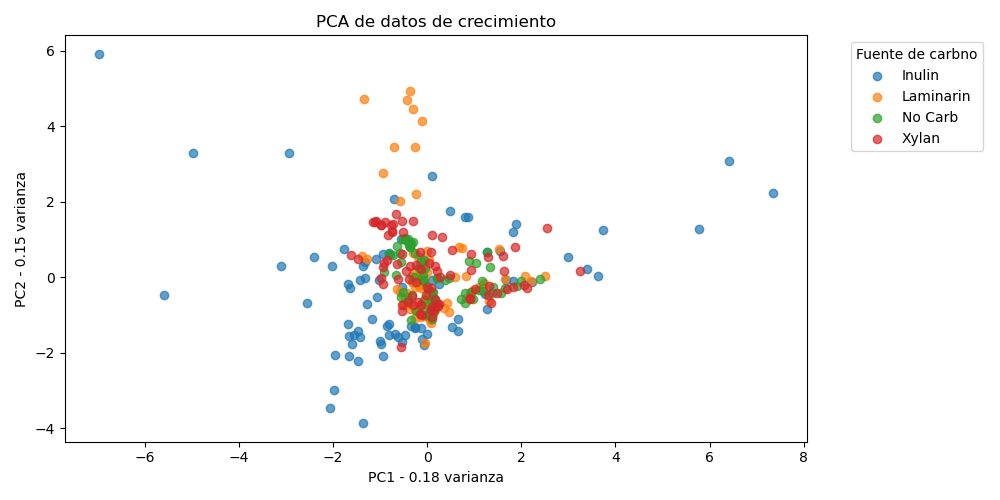

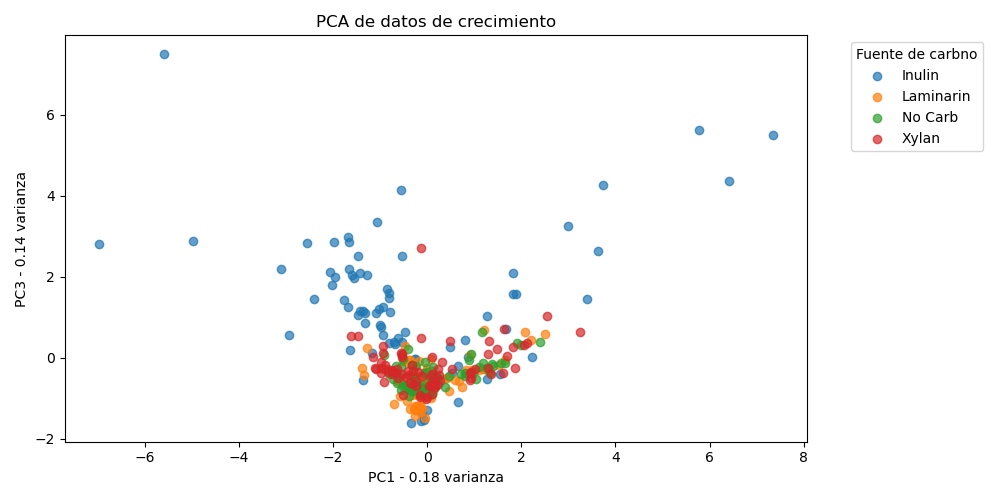

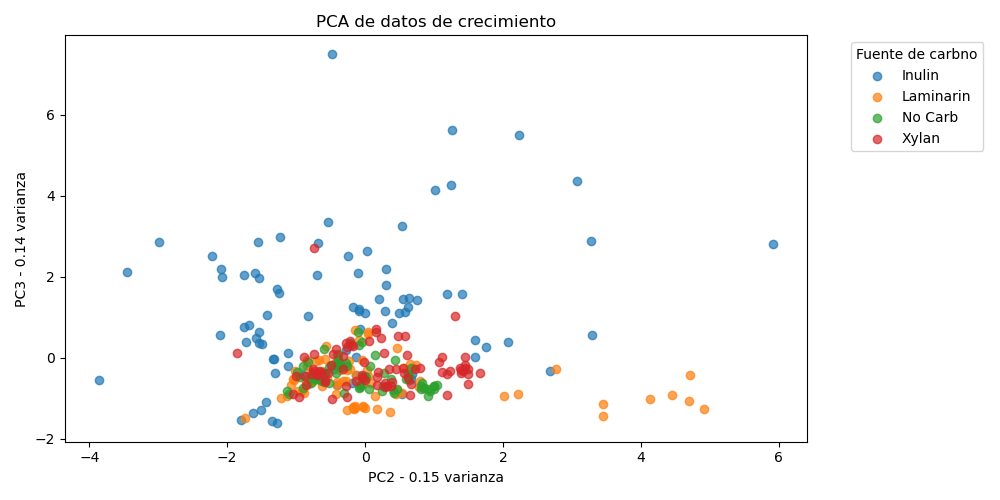

In [39]:
# 2 pca to visualize
from mpl_toolkits.mplot3d import Axes3D
import itertools as it
pca_2d = PCA(n_components=3)
pca_2d.fit(data_groth)
pca_2d_data = pca_2d.transform(data_groth)

pca_df = pd.DataFrame(pca_2d_data, columns=['PC1', 'PC2','PC3'])
pca_df['Treatments'] = data['Treatments'].values
colors = plt.cm.tab10
norm = plt.Normalize(vmin=0, vmax=len(pca_df['Treatments'].unique())-1)
for i in it.combinations(['PC1', 'PC2', 'PC3'], 2):
    fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
    for c, treat in enumerate(pca_df['Treatments'].unique()):
        subset = pca_df[pca_df['Treatments'] == treat]
        ax.scatter(subset[i[0]], subset[i[1]], label=treat, alpha=0.7, color = colors(c))
    explained_variance_2d = pca_2d.explained_variance_ratio_
    ax.set_xlabel(f'{i[0]} - {explained_variance_2d[int(i[0][-1])-1]:.2f} varianza')
    ax.set_ylabel(f'{i[1]} - {explained_variance_2d[int(i[1][-1])-1]:.2f} varianza')
    # ax.set_ylabel('PC2')
    ax.set_title('PCA de datos de crecimiento')
    ax.legend(title='Fuente de carbno', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    fig.savefig(join('Figures', f'pca_growth_data_{i[0]}_{i[1]}.svg'), dpi=300)
    

# UMAP

/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/

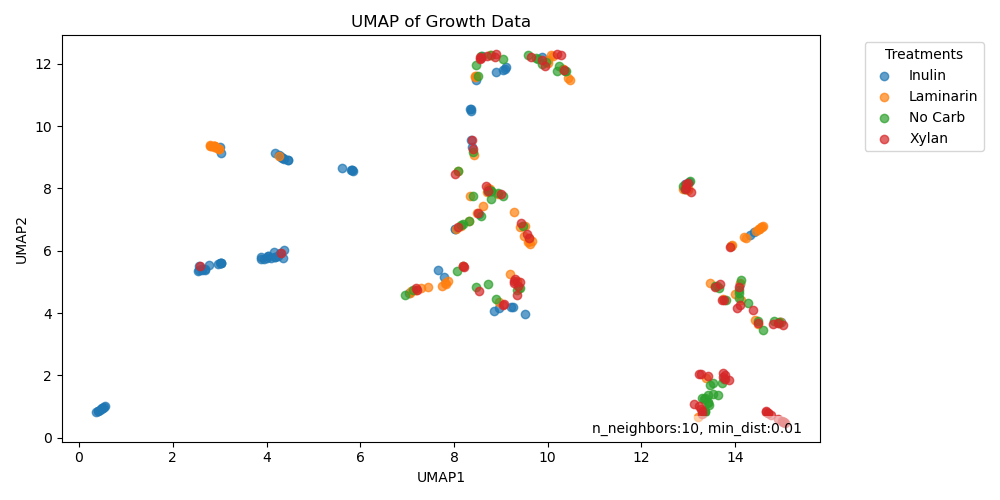

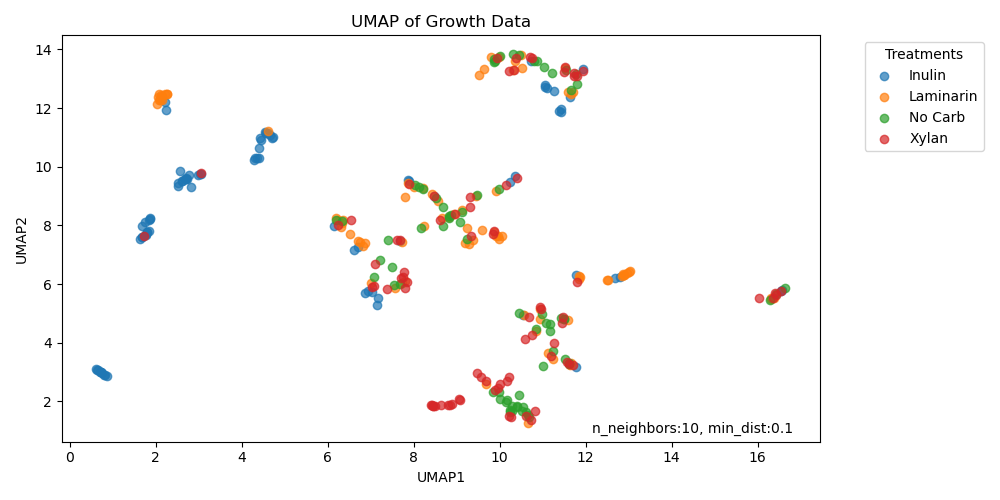

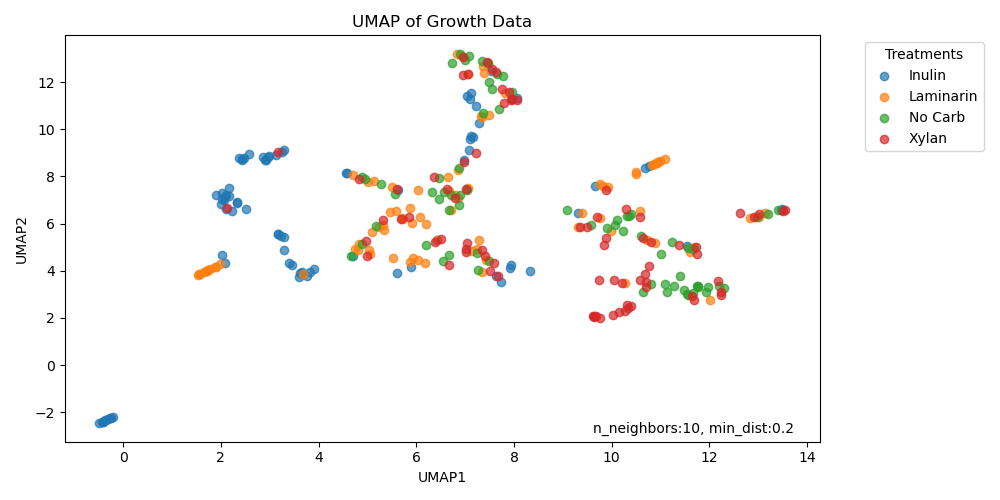

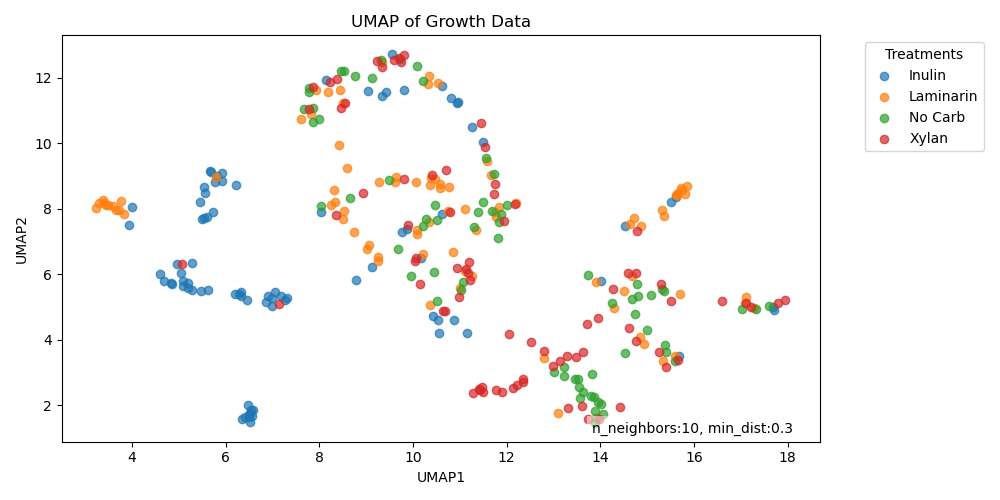

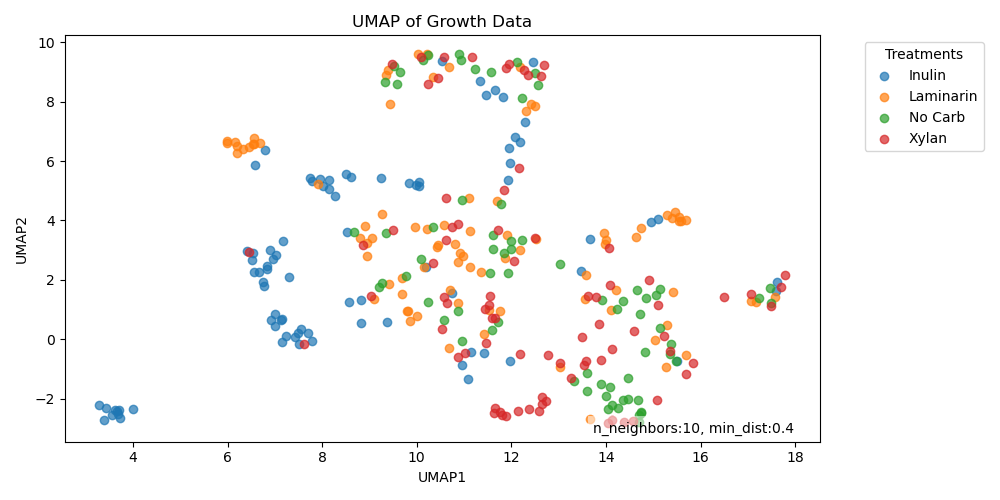

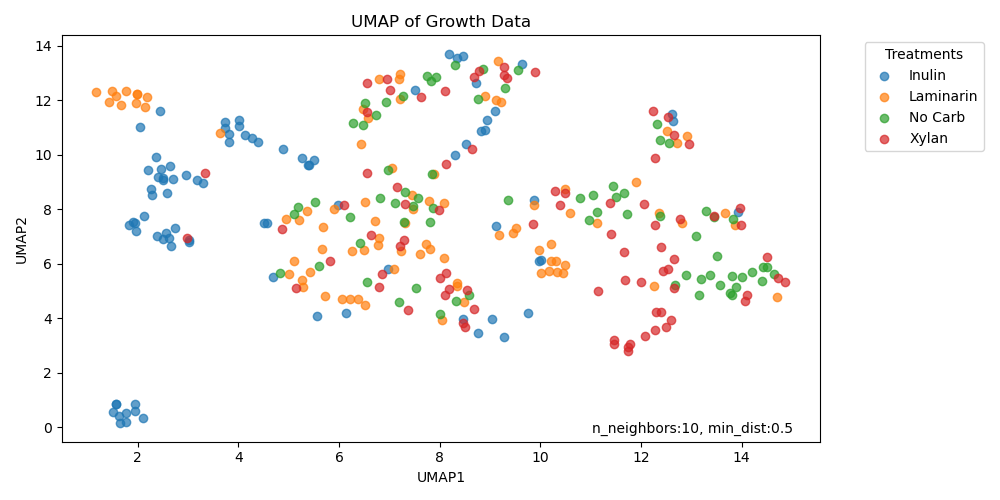

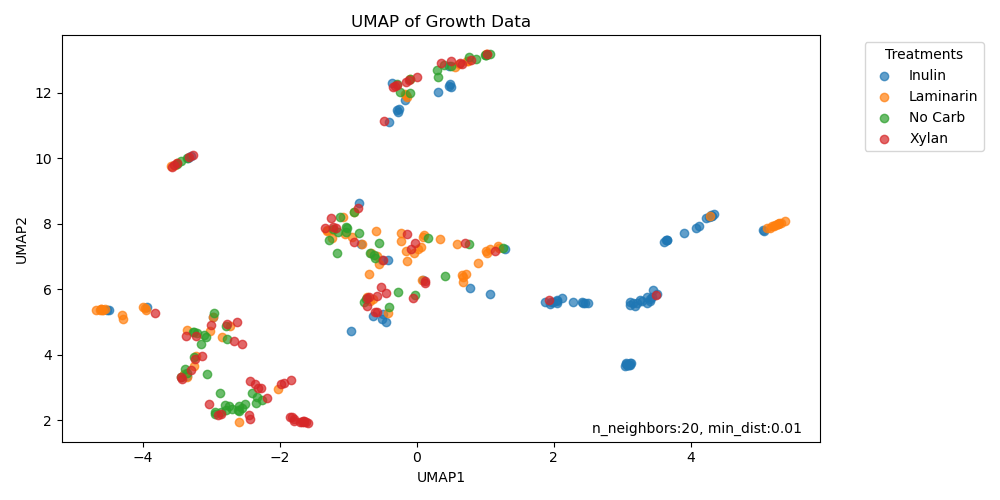

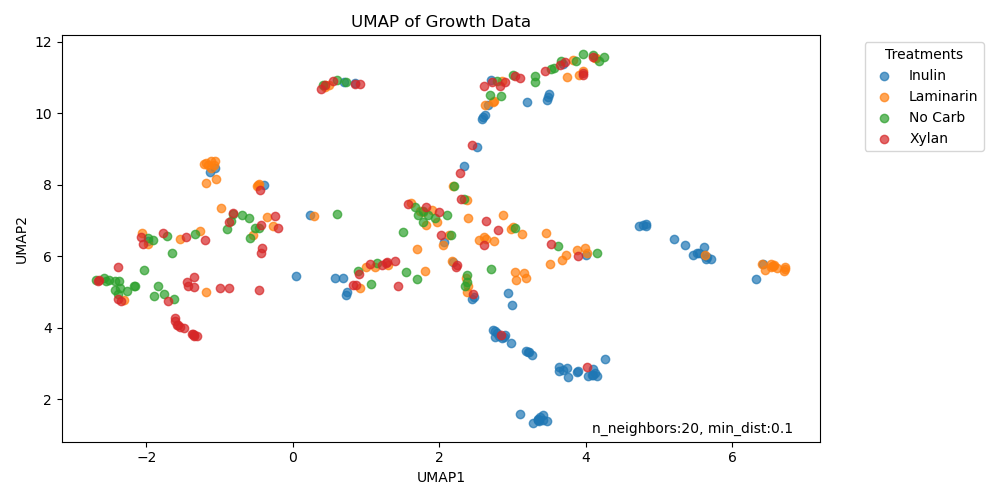

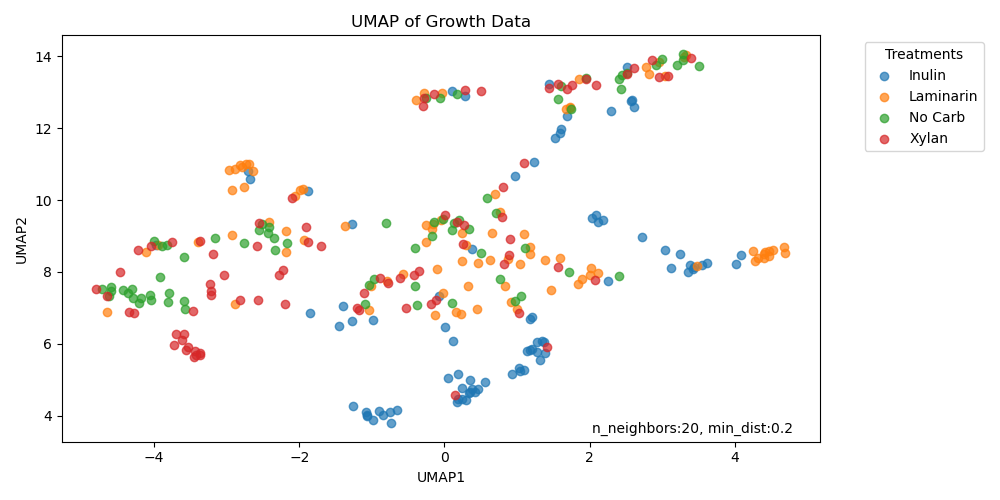

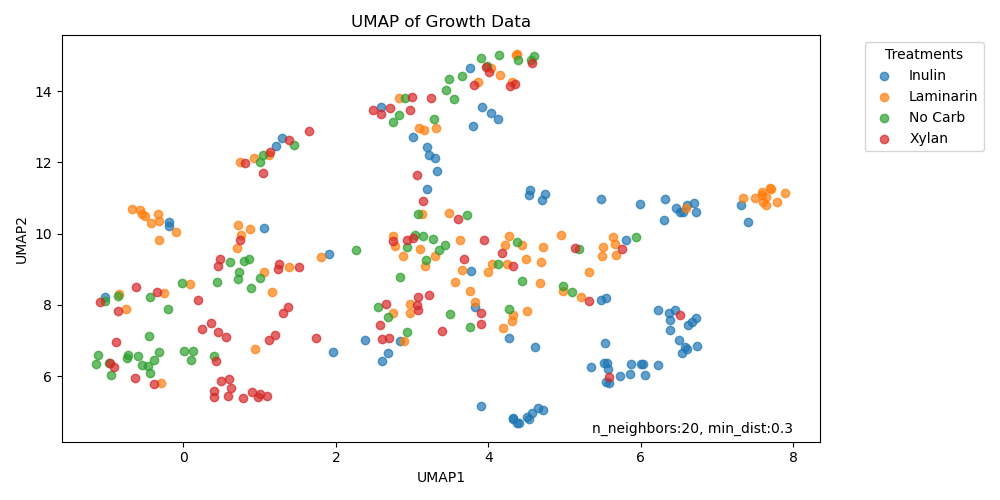

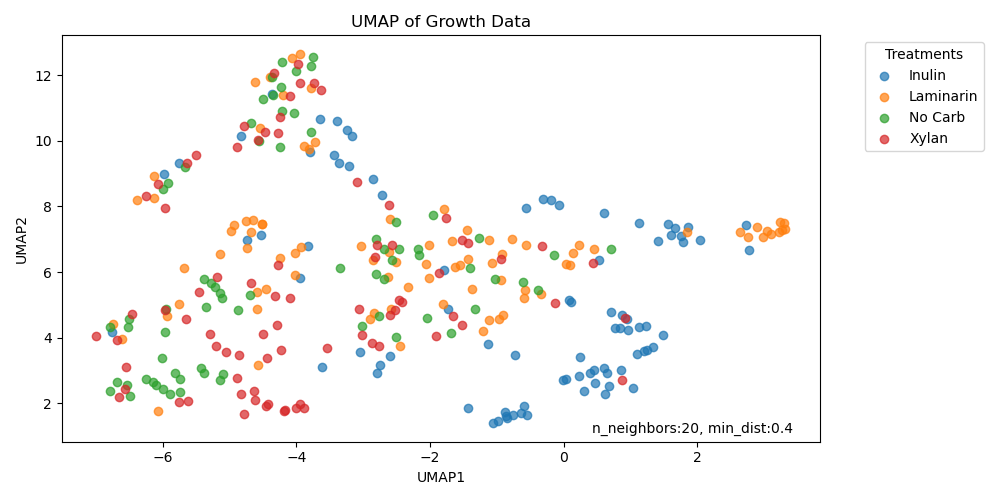

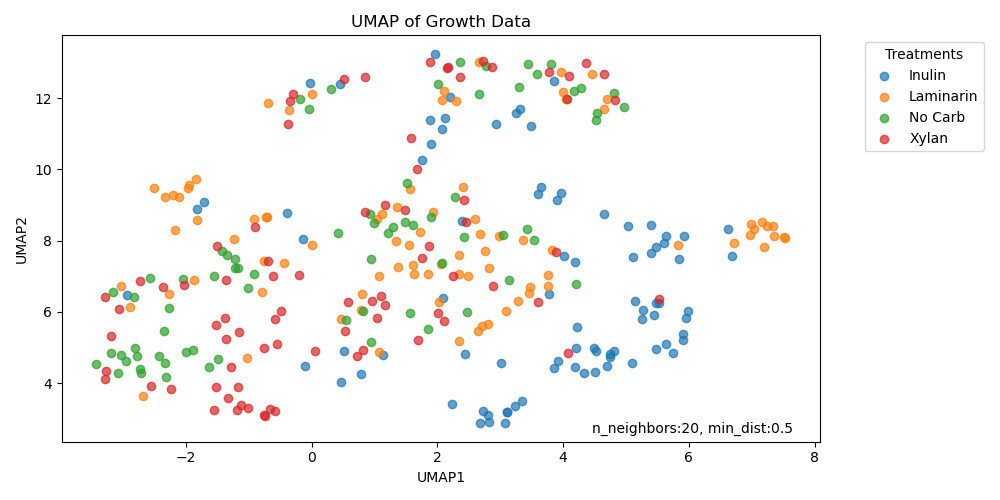

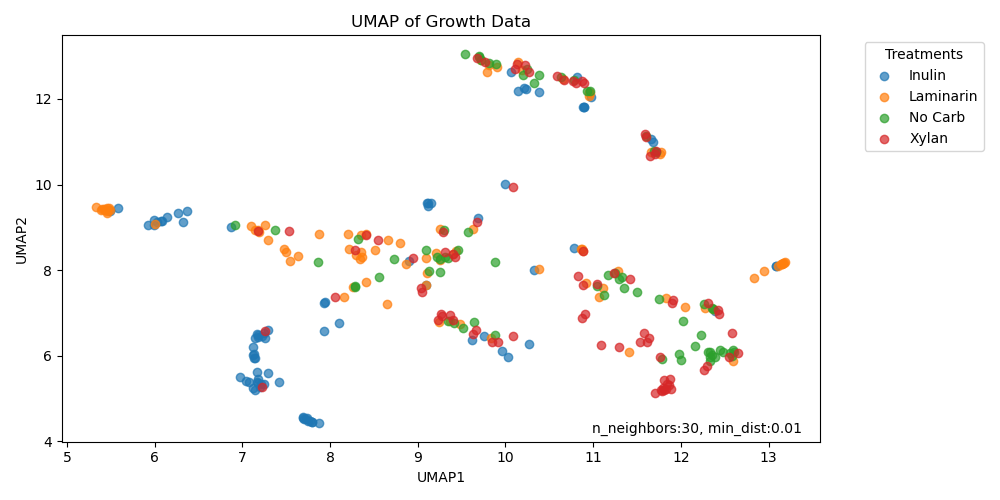

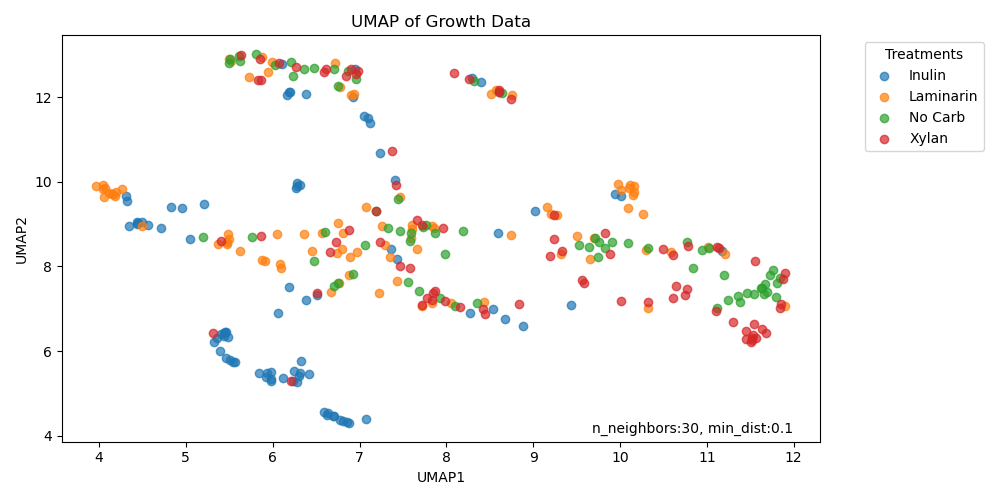

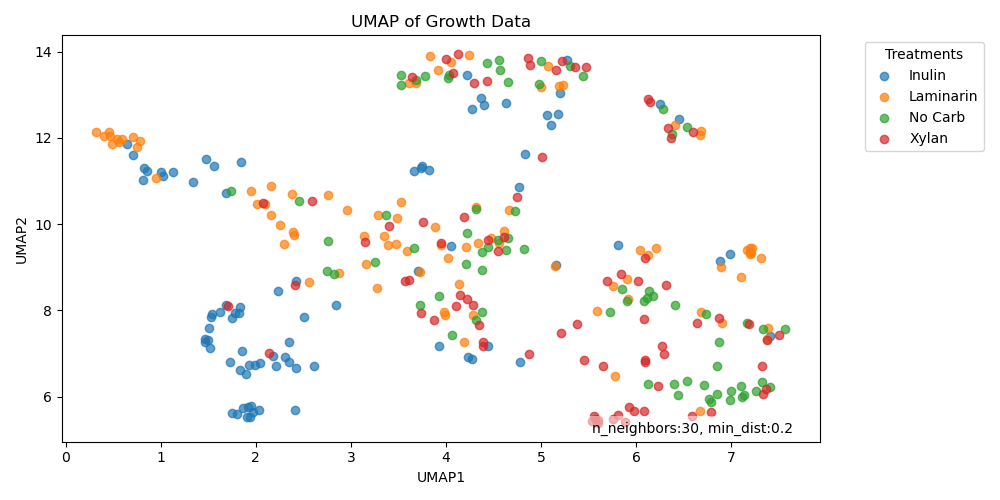

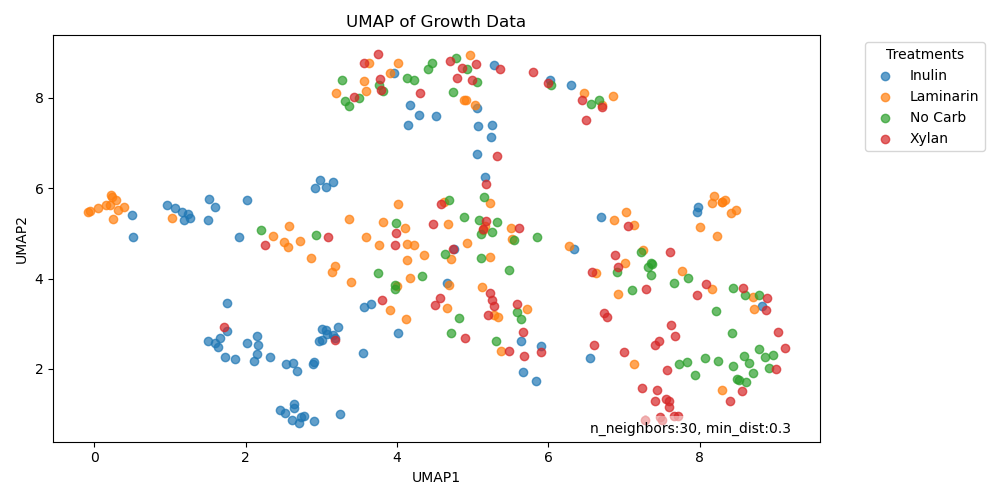

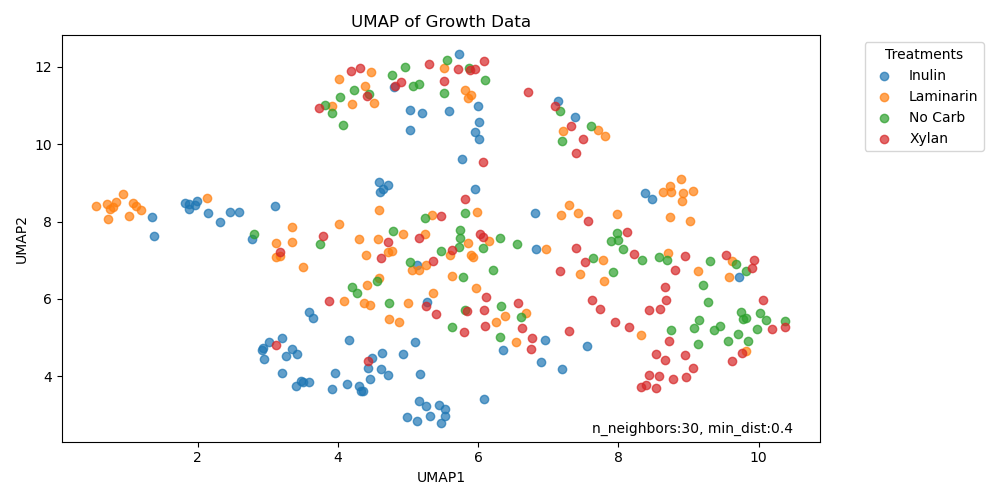

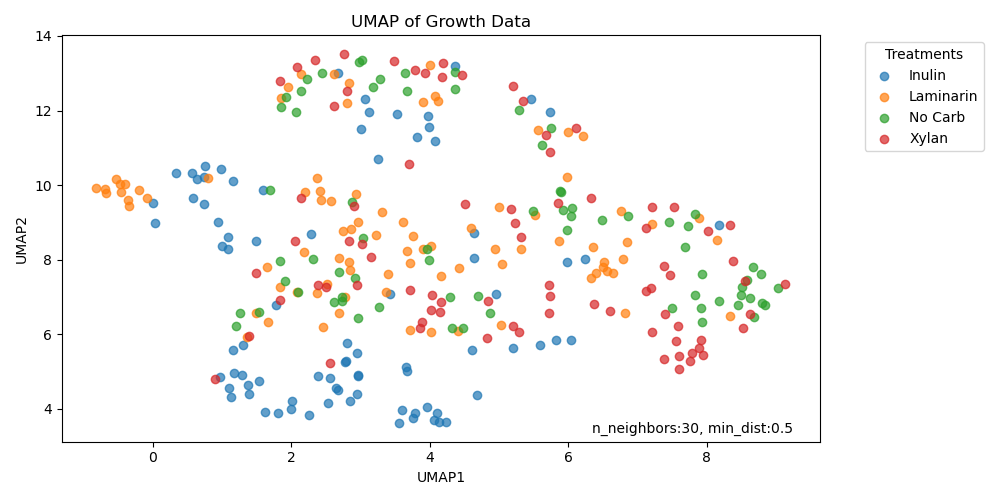

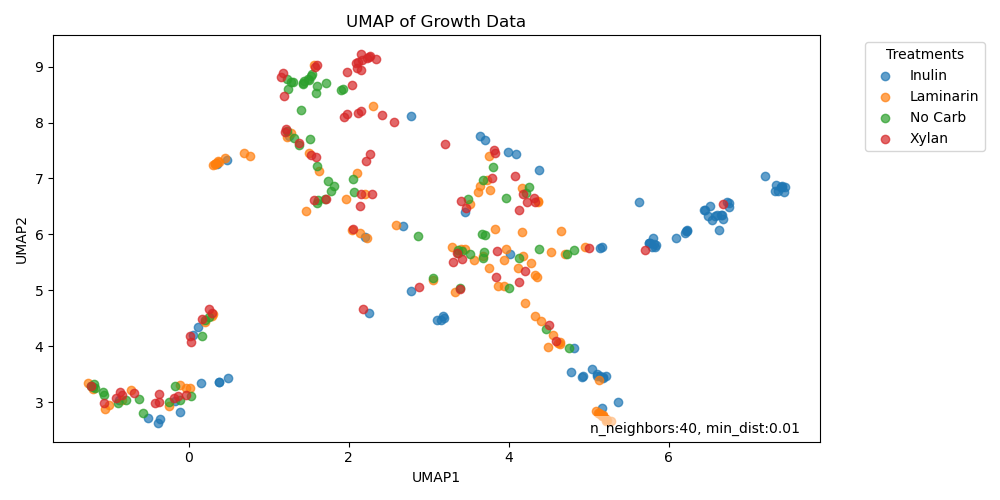

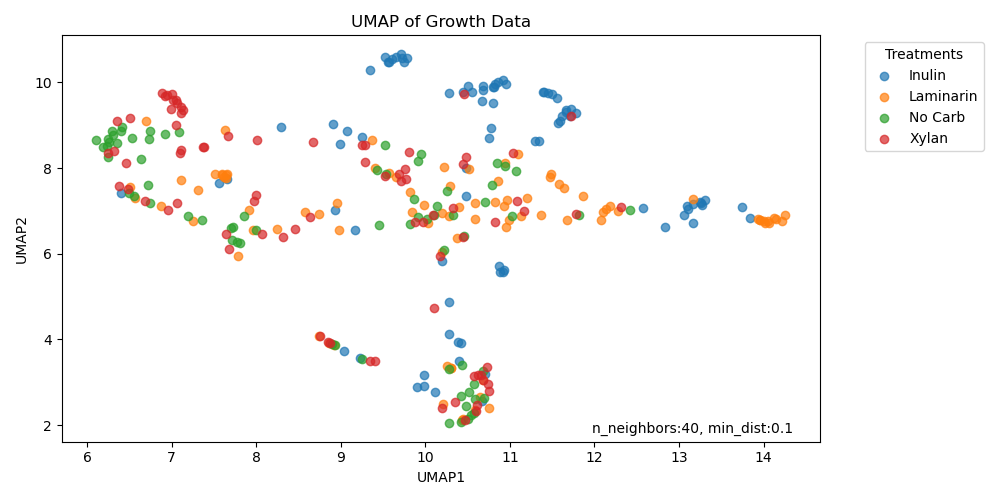

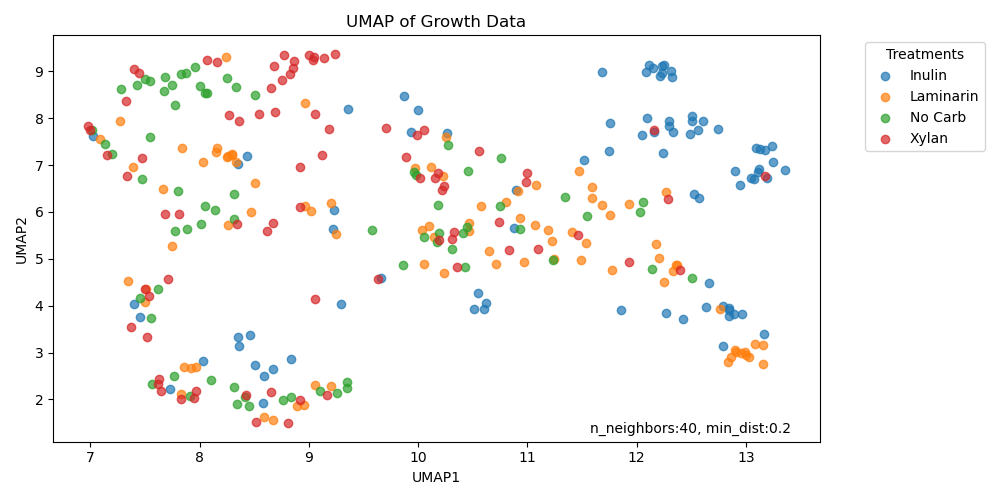

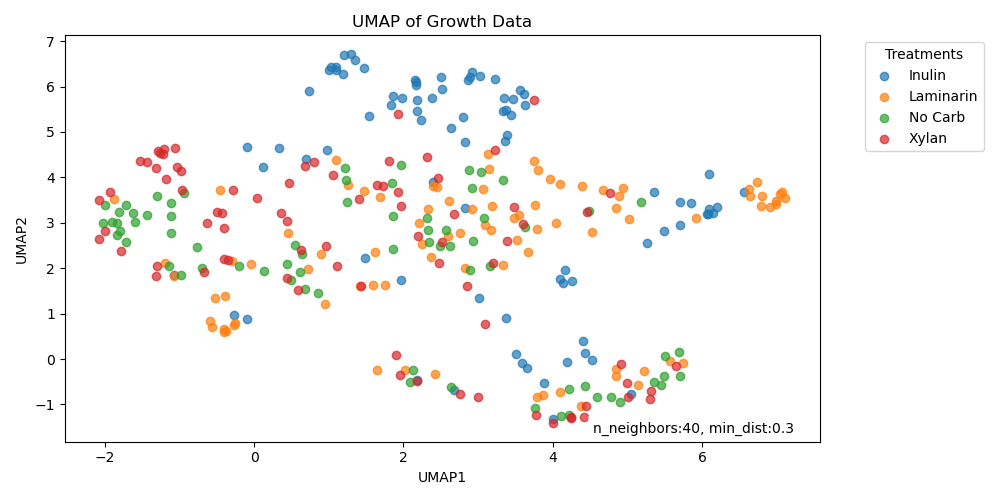

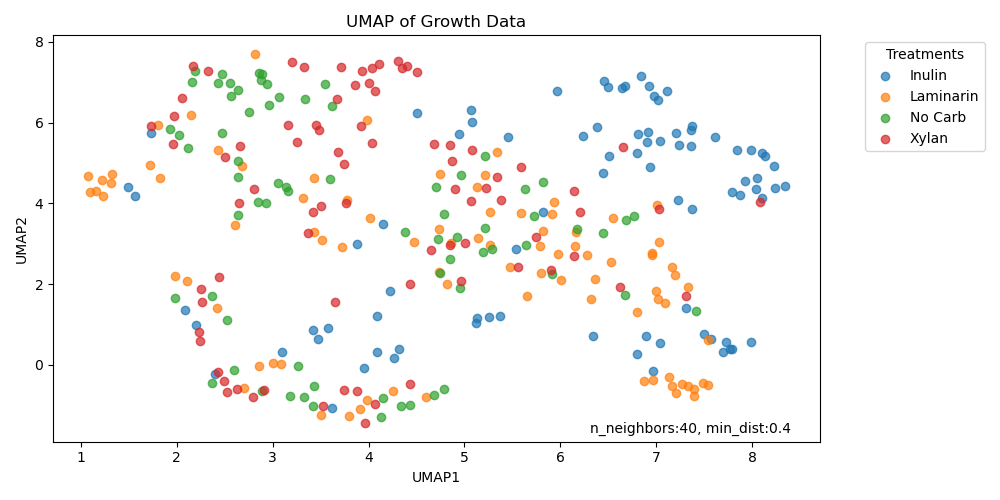

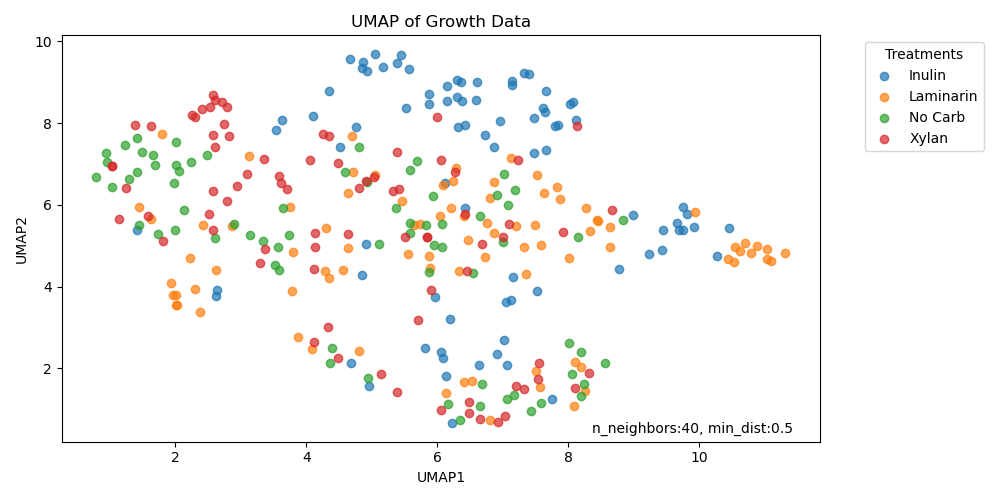

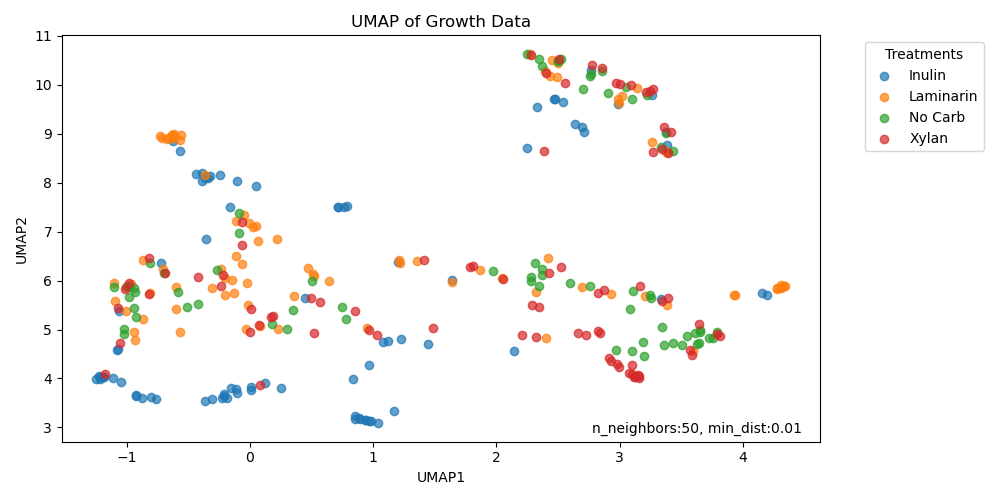

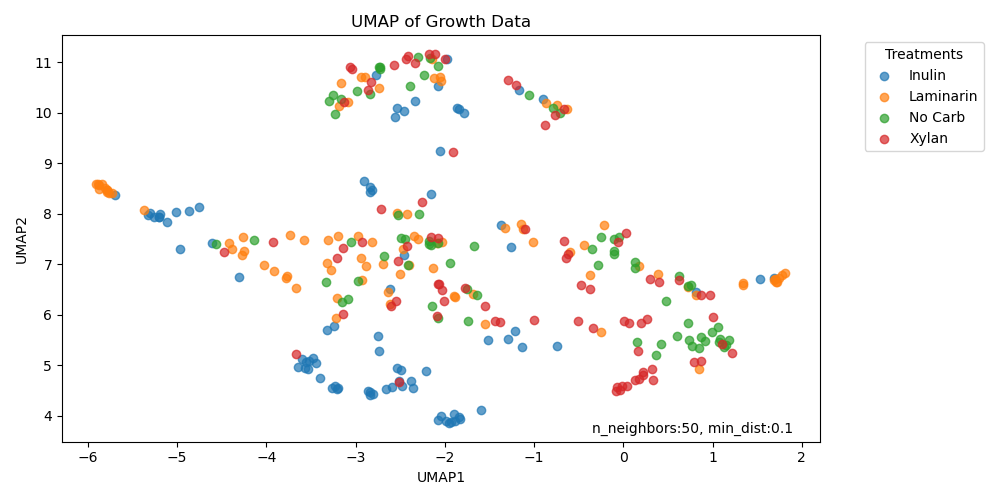

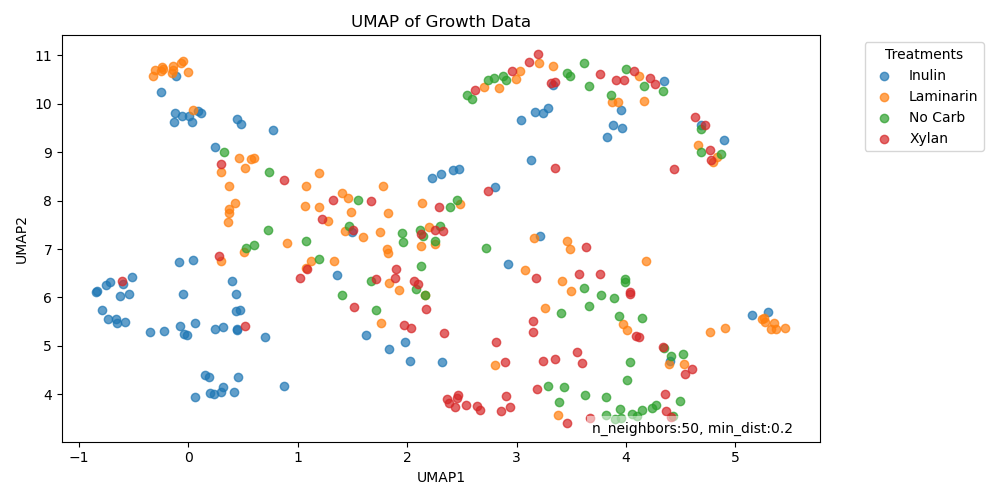

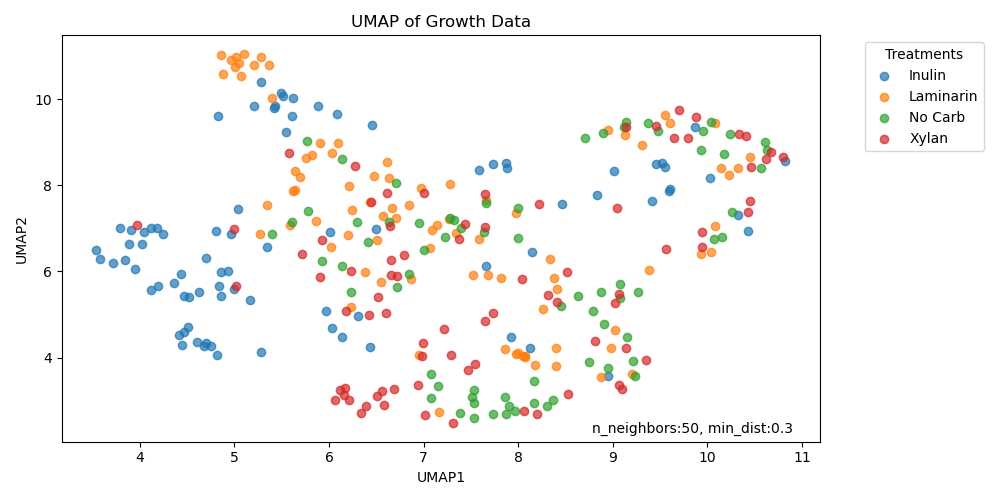

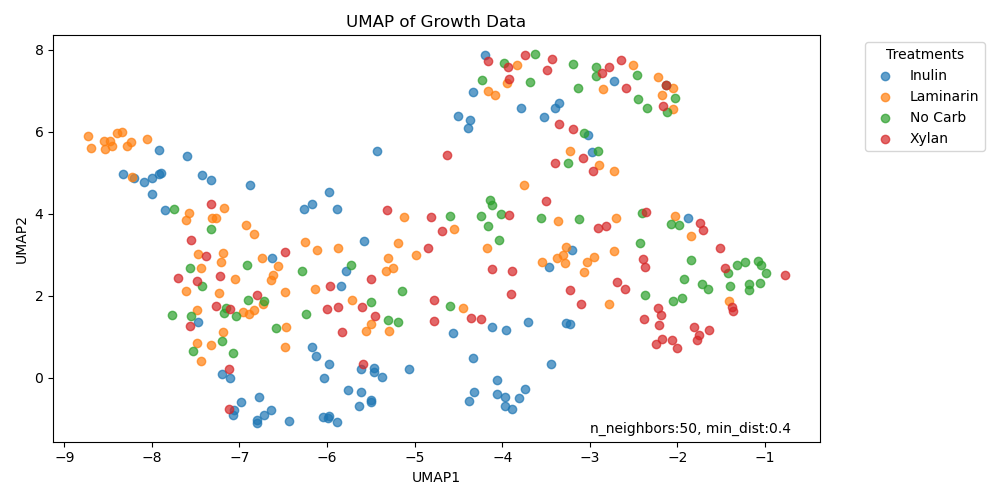

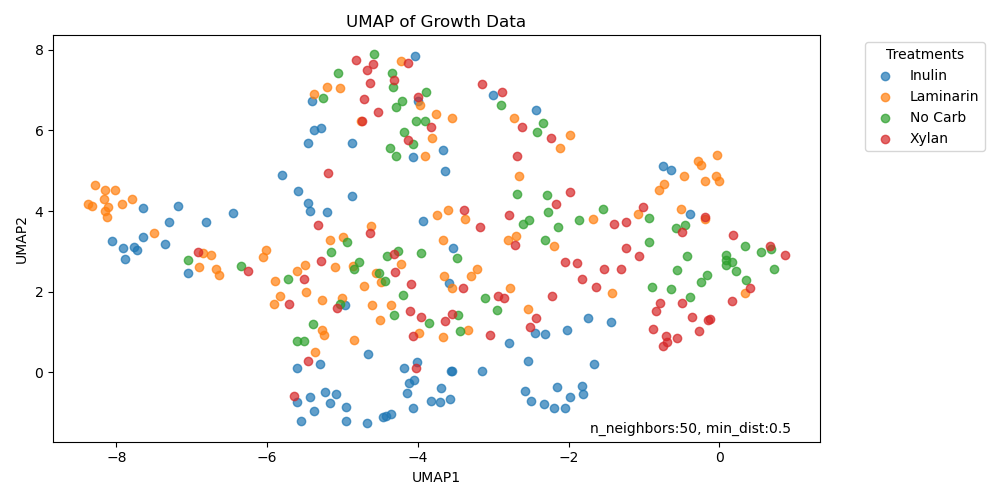

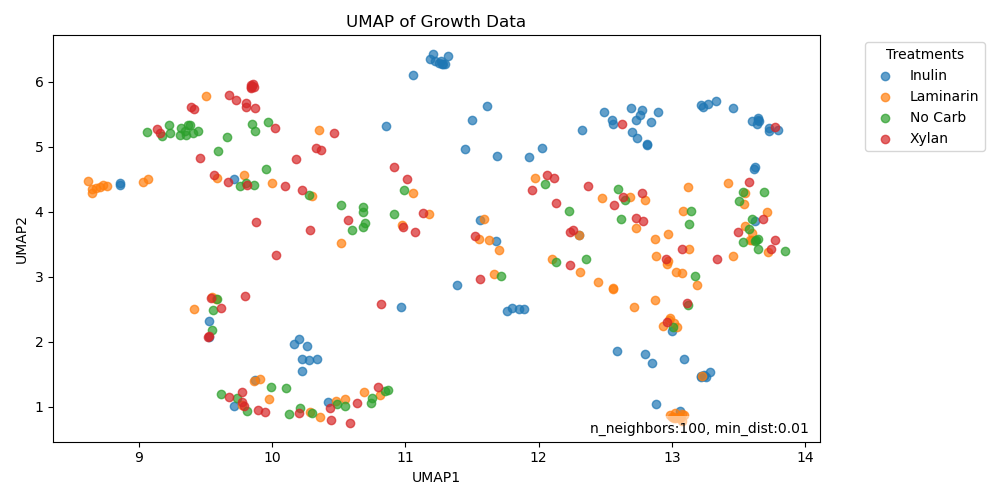

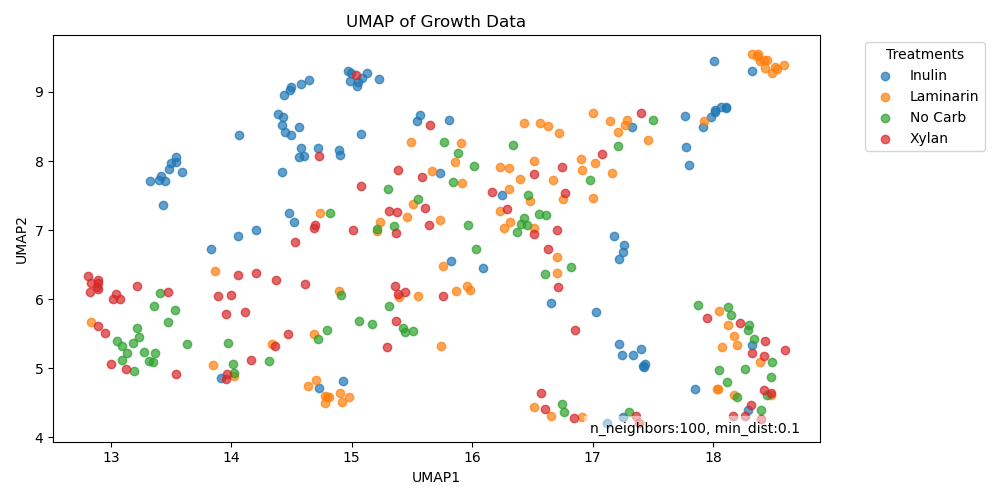

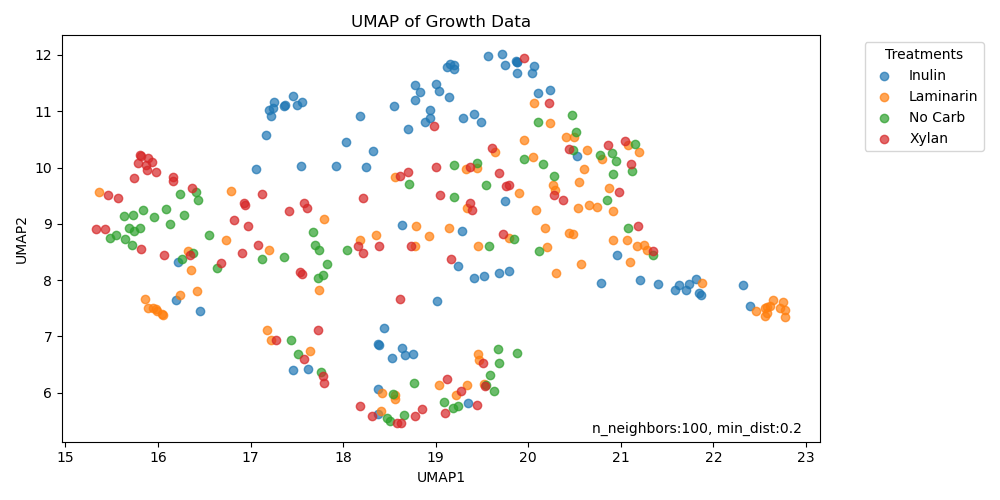

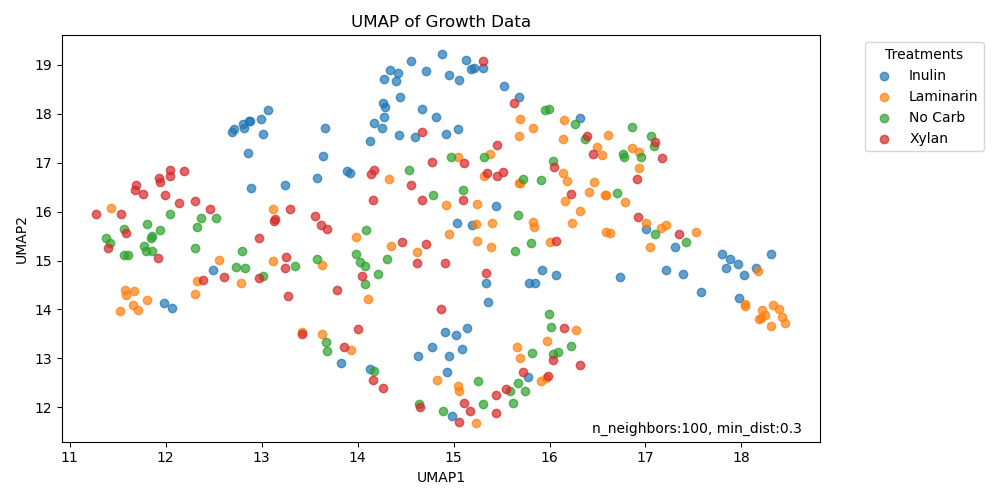

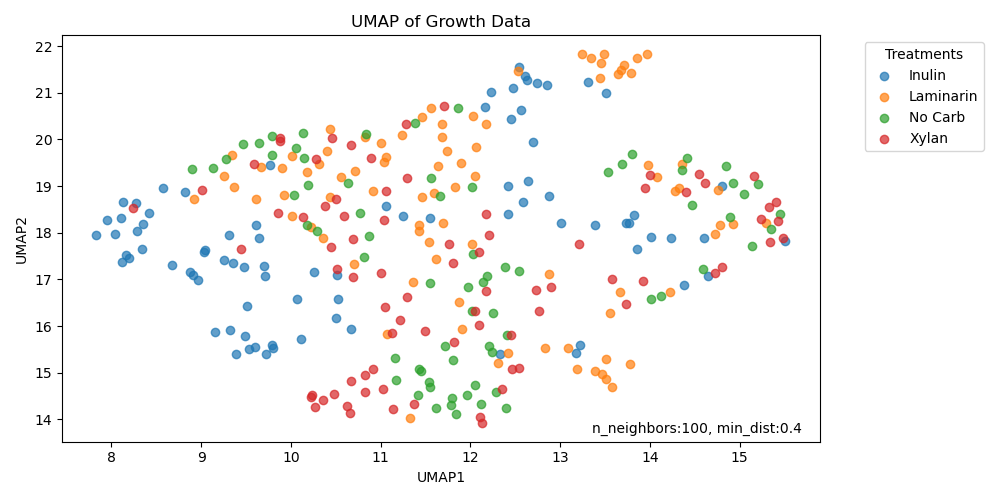

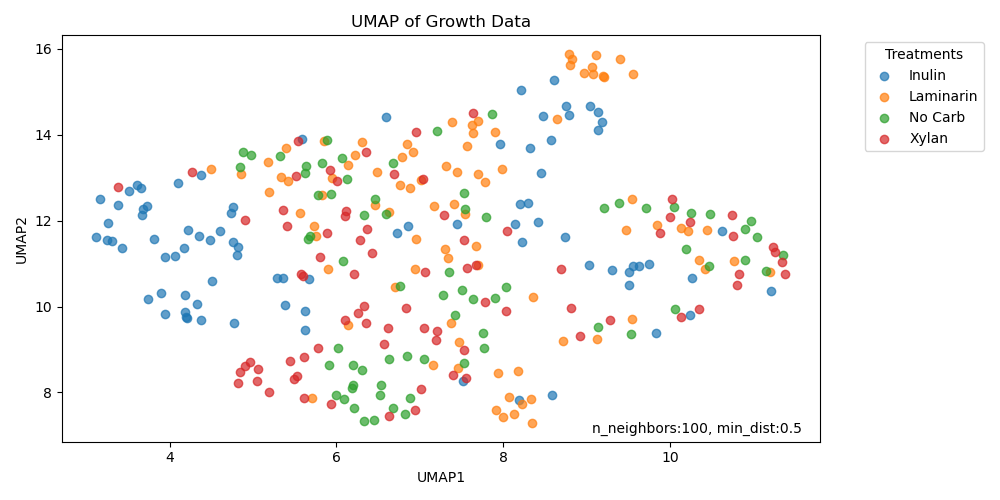

In [7]:
### umap
np.random.seed(42)  # For reproducibility
n_tryes = [10, 20, 30, 40, 50, 100]
min_tries = [0.01,0.1, 0.2, 0.3, 0.4, 0.5]
for n in n_tryes:
    for d in min_tries:
        parameters = {
            'n_neighbors': n,
            'min_dist': d,
        }
        umap_obj = umap.UMAP(n_components=2 ,n_jobs = -1, n_neighbors = n , min_dist = d ,metric='euclidean')
        mask_labels = data['Treatments'].astype('category').cat.codes.values.copy()
        mask_labels[np.random.choice(len(mask_labels), size=len(mask_labels)//1, replace=False)] = -1


        umap_obj.fit(data_groth)
        umap_data = umap_obj.transform(data_groth)

        # import matplotlib.pyplot as plt
        umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
        umap_df['Treatments'] = data['Treatments'].values   

        fig, ax = plt.subplots(dpi=100, figsize=(10, 5))
        colors = plt.cm.tab10
        norm = plt.Normalize(vmin=0, vmax=len(umap_df['Treatments'].unique())-1)
        for c, treat in enumerate(umap_df['Treatments'].unique()):
            subset = umap_df[umap_df['Treatments'] == treat]
            ax.scatter(subset['UMAP1'], subset['UMAP2'], label=treat, alpha=0.7, color = colors(c))

        text_params = [f'{i}:{j}' for i,j in parameters.items()]

        ax.text(0.7, 0.05, f"{', '.join(text_params)}",
                transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))    
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.set_title('UMAP of Growth Data')
        ax.legend(title='Treatments', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()

/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/VenturelliLab/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


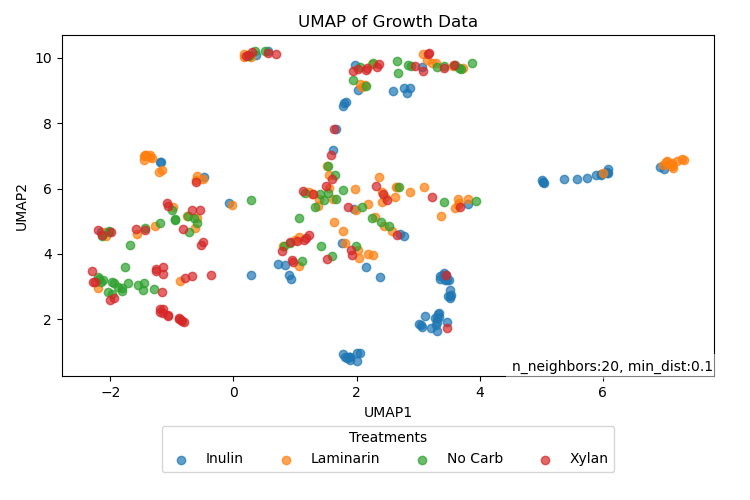

In [ ]:
n = 20
d = 0.1
parameters = {
            'n_neighbors': n,
            'min_dist': d,
}
umap_obj = umap.UMAP(n_components=2 ,n_jobs = -1, n_neighbors = n , min_dist = d ,metric='euclidean')
mask_labels = data['Treatments'].astype('category').cat.codes.values.copy()
mask_labels[np.random.choice(len(mask_labels), size=len(mask_labels)//1, replace=False)] = -1


umap_obj.fit(data_groth)
umap_data = umap_obj.transform(data_groth)

# import matplotlib.pyplot as plt
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Treatments'] = data['Treatments'].values   

fig, ax = plt.subplots(dpi=100, figsize=(7.5, 5))
colors = plt.cm.tab10
norm = plt.Normalize(vmin=0, vmax=len(umap_df['Treatments'].unique())-1)
for c, treat in enumerate(umap_df['Treatments'].unique()):
    subset = umap_df[umap_df['Treatments'] == treat]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], label=treat, alpha=0.7, color = colors(c))

text_params = [f'{i}:{j}' for i,j in parameters.items()]

ax.text(0.69, 0.05, f"{', '.join(text_params)}",
        transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))    
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_title('UMAP of Growth Data')
ax.legend(title='Fuente de Carbono', bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=4)
plt.tight_layout()
fig.savefig(join('Figures', 'umap_growth_data.svg'), dpi=600)